In [1]:
!pip install diffusers["torch"] transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 20.5 MB/s eta 0:00:00


 DONE

In [2]:
!pip install accelerate


In [3]:
!pip install git+https://github.com/huggingface/diffusers

  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-489qavp9
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-489qavp9
  Resolved https://github.com/huggingface/diffusers to commit 2ee3215949d8f2d3141c2340d8e4d24ec94b2384
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.31.0.dev0-py3-none-any.whl size=2699962 sha256=039d283865081e95b0b1dfebdad0cb0f31b6a66f98d99056f0fe6068a2d24012
  Stored in directory: /tmp/pip-ephem-wheel-cache-l1g97tkn/wheels/f7/7d/99/d361489e5762e3464b3811bc629e94cf5bf5ef44dd5c3c4d52
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.30.2
    Uninstalling diffusers-0.30.2:
      Successfully uninstalled diffusers-0.30.2


In [4]:
import torch

from diffusers import AutoPipelineForText2Image



#pipe = StableDiffusionPipeline.from_pretrained("emilianJR/chilloutmix_NiPrunedFp32Fix",torch_dtype=torch.float16)
#pipe = StableDiffusionPipeline.from_pretrained("emilianJR/epiCRealism", torch_dtype=torch.float16)
#pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16)
pipe= AutoPipelineForText2Image.from_pretrained("SG161222/Realistic_Vision_V6.0_B1_noVAE",torch_dtype=torch.float16)


pipe = pipe.to("cuda")
pipe.safety_checker = None


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/374 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.58k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--SG161222--Realistic_Vision_V6.0_B1_noVAE/snapshots/054388b9ee387e2cbc41211d92b69eb2d05c9ce6/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--SG161222--Realistic_Vision_V6.0_B1_noVAE/snapshots/054388b9ee387e2cbc41211d92b69eb2d05c9ce6/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--SG161222--Realistic_Vision_V6.0_B1_noVAE/snapshots/054388b9ee387e2cbc41211d92b69eb2d05c9ce6/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/hu

UP to here

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["inspired by picasso's bold, abstract shapes."]


  0%|          | 0/50 [00:00<?, ?it/s]

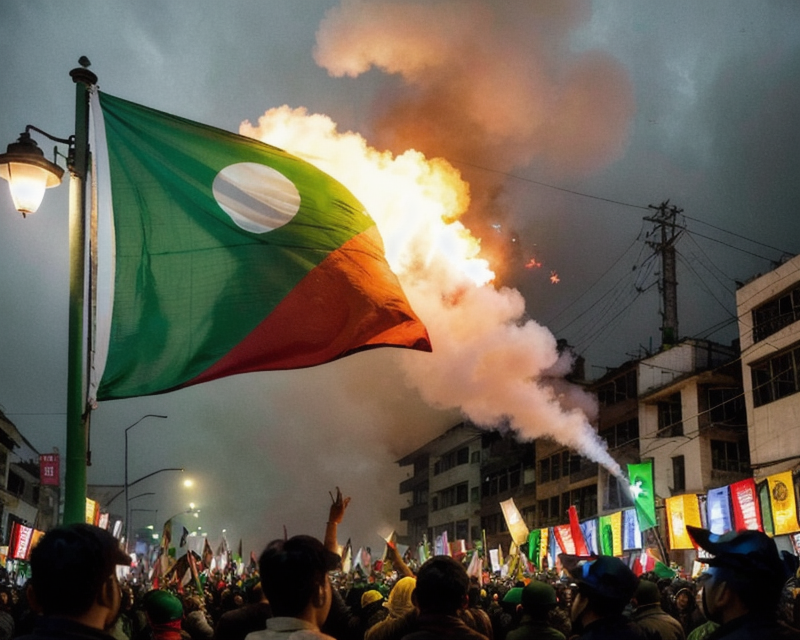

In [17]:
prompt = "Bangladesh, a large crowd of protesters in the street, waving green flags with red circles, intense clashes with police, guns blazing, Bangladesh flag prominently visible, street lights casting a harsh glow, highly detailed, vibrant colors, low light, cinematic atmosphere, mid-shot perspective, dramatic tension, highly detailed, rendered in Unreal Engine style, cinematic wallpaper with a gloomy mood, inspired by Picasso's bold, abstract shapes."
h=640
w=800
steps=50
guidance=8.5
neg = "cars, easynegative, lowres, bad anatomy, bad hands, text, error, missing limbs, bad anatomy,watermark"

image = pipe(
    prompt,
    num_inference_steps=steps,
    height=h,
    width=w,
    guidance_scale=guidance,
    negative_prompt=neg,

).images[0]
image

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['in unreal engine style, highly detailed, cinematic wallpaper with a dreamy, ethereal mood.']


  0%|          | 0/50 [00:00<?, ?it/s]

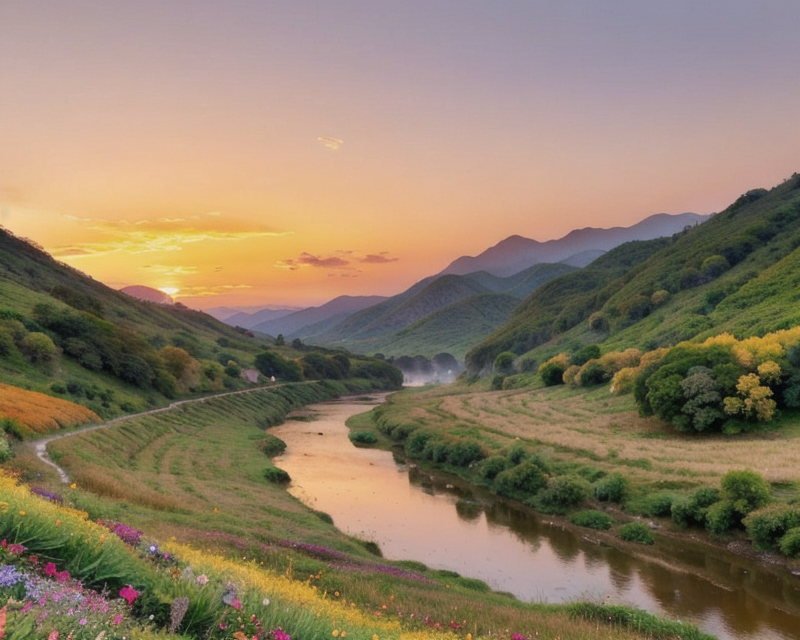

In [18]:
prompt = "A breathtaking landscape at sunset, rolling hills covered in lush greenery, a calm river winding through the valley, vibrant flowers in bloom along the riverbank, a sky painted with warm hues of orange, pink, and purple, the sun casting a golden glow over the scene, distant mountains shrouded in mist, highly detailed, serene and peaceful atmosphere, cinematic wide shot, rendered in Unreal Engine style, highly detailed, cinematic wallpaper with a dreamy, ethereal mood."
h = 640
w = 800
steps = 50
guidance = 8.5
neg = "cars, buildings, people, easynegative, lowres, bad anatomy, text, error, bad lighting, overexposed, watermark"

image = pipe(
    prompt,
    num_inference_steps=steps,
    height=h,
    width=w,
    guidance_scale=guidance,
    negative_prompt=neg,
).images[0]

image


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', cinematic wallpaper with a tranquil mood, inspired by the gentle, flowing lines of classical art.']


  0%|          | 0/50 [00:00<?, ?it/s]

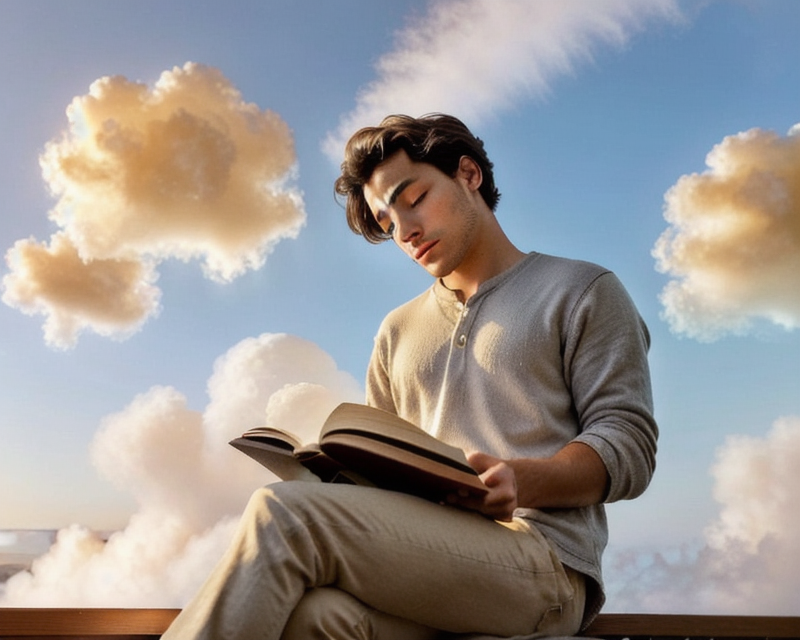

In [19]:
prompt = "A man sitting above the clouds, engrossed in reading a book, serene and peaceful atmosphere, soft sunlight filtering through the clouds, gentle breeze ruffling the pages, highly detailed, ethereal and dreamy, vibrant yet calming colors, low light with a golden glow, cinematic ambiance, mid-shot perspective, floating in the sky, surreal environment, rendered in Unreal Engine style, cinematic wallpaper with a tranquil mood, inspired by the gentle, flowing lines of classical art."
h=640
w=800
steps=50
guidance=8.5
neg = "cars, easynegative, lowres, bad anatomy, bad hands, text, error, missing limbs, bad anatomy,watermark"

image = pipe(
    prompt,
    num_inference_steps=steps,
    height=h,
    width=w,
    guidance_scale=guidance,
    negative_prompt=neg,

).images[0]
image

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['engine style, highly detailed, cinematic wallpaper with a lively and energetic mood.']


  0%|          | 0/50 [00:00<?, ?it/s]

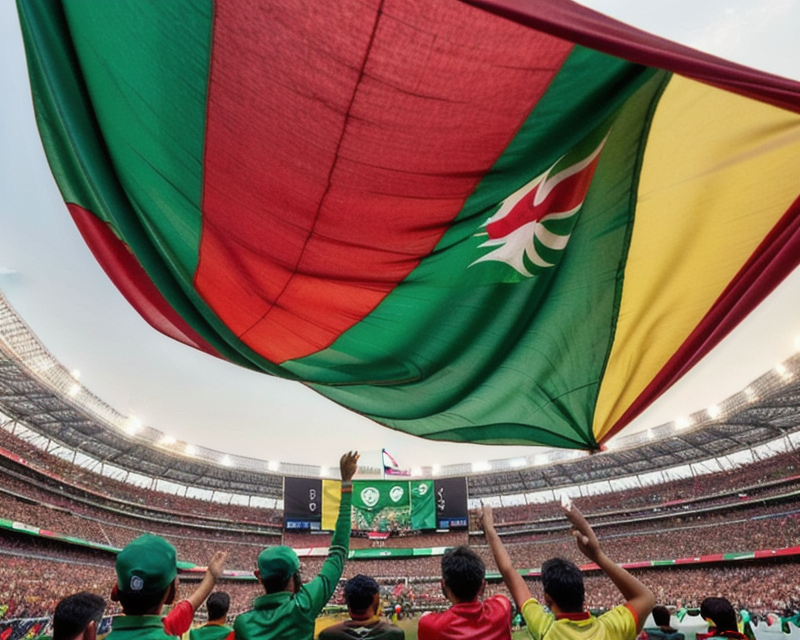

In [8]:
prompt = "A vibrant crowd in a stadium gallery, excited fans watching a Bangladesh cricket match, people wearing green and red with Bangladesh flags, cheering and waving flags, intense focus on the game, vibrant and colorful atmosphere, stadium lights shining down, players visible on the field in the background, mid-shot perspective capturing the energy of the crowd, highly detailed, cinematic atmosphere, rendered in Unreal Engine style, highly detailed, cinematic wallpaper with a lively and energetic mood."
h = 640
w = 800
steps = 50
guidance = 8.5
neg = "empty seats, blurry faces, lowres, bad anatomy, text, error, bad lighting, overexposed, watermark, easynegative"

image = pipe(
    prompt,
    num_inference_steps=steps,
    height=h,
    width=w,
    guidance_scale=guidance,
    negative_prompt=neg,
).images[0]

image


In [9]:
from diffusers import StableDiffusionPipeline
import torch

model_ckpt = "CompVis/stable-diffusion-v1-4"
sd_pipeline = StableDiffusionPipeline.from_pretrained(model_ckpt, torch_dtype=torch.float16).to("cuda")

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [10]:
!pip install torchmetrics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 22.4 MB/s eta 0:00:00


In [12]:
from torchmetrics.functional.multimodal import clip_score
from functools import partial

clip_score_fn = partial(clip_score, model_name_or_path="openai/clip-vit-base-patch16")

def calculate_clip_score(images, prompts):
    images_int = (images * 255).astype("uint8")
    clip_score = clip_score_fn(torch.from_numpy(images_int).permute(0, 3, 1, 2), prompts).detach()
    return round(float(clip_score), 4)

sd_clip_score = calculate_clip_score(image, prompt)
print(f"CLIP score: {sd_clip_score}")

TypeError: unsupported operand type(s) for *: 'Image' and 'int'